In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Brief view of dataset

Load dataset

In [20]:
#read dataset
df_read = pd.read_csv('../input/mental-heath-in-tech-2016_20161114.csv')
print(df_read.shape)
print(df_read.columns)

(1433, 63)
Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you thi

In [21]:
print(df_read['Do you currently have a mental health disorder?'].unique())
print(df_read['Do you currently have a mental health disorder?'].isna().sum())

['No' 'Yes' 'Maybe']
0


check on null

In [22]:
#check on null
df = df_read.copy()
print(df_read.dtypes.value_counts()) #how many of each data types are there
# print(df_read.dtypes[df_read.dtypes!=object])
for eachcol in df_read.columns:
    missing = (df_read[eachcol].isnull()).sum()/df_read.shape[0]*100 #percent of null values there are in each col
    if missing > 60:
        print(eachcol, missing) #print out those that have over 60% of missing values
        df = df.drop(eachcol, axis = 1)
    if eachcol == 'Have you been diagnosed with a mental health condition by a medical professional?':
        print(eachcol, missing)#make sure that the above question has enough data
        print(df_read[eachcol].value_counts()) #how many yeses and nos
        #half yes and half no
print('dropped', df_read.shape[1] - df.shape[1], 'columns')

object     56
int64       4
float64     3
dtype: int64
Is your primary role within your company related to tech/IT? 81.64689462665736
Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues? 79.97208653175157
Do you know local or online resources to seek help for a mental health disorder? 79.97208653175157
If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts? 79.97208653175157
If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively? 89.95115143056525
If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees? 79.97208653175157
If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively? 79.97208653175157
Do you believe your productivity is ever affected by a mental health is

get rid of rows of self-employed answers

In [23]:
df_selfemploy = df[df['Are you self-employed?'] == 1]
df = df[df['Are you self-employed?'] == 0].reset_index().drop('index', axis = 1).drop('Are you self-employed?', axis = 1)
print(df.shape)
print(df.index)

(1146, 51)
RangeIndex(start=0, stop=1146, step=1)


eliminate age lower than 21 and 100

3 323
22


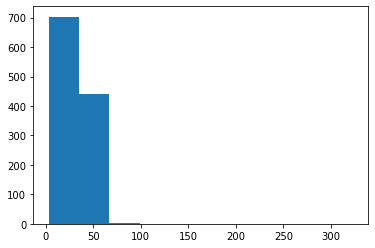

In [24]:
print(min(df['What is your age?']), max(df['What is your age?']))
print((df['What is your age?']<=21).sum()) #there are 28  answers that are under 21
plt.hist(df['What is your age?'])
plt.show()

df = df[(df['What is your age?']>=21) & (df['What is your age?'] < 100)]
df = df.reset_index().drop('index', axis = 1)

what happens if split dataframe to US and non-US

In [25]:
#find if number of people having/not having mental health conditions is even if split dataframe into inside US and outside of US
us_counts = df.loc[df['What country do you live in?'] == 'United States of America', 'Have you been diagnosed with a mental health condition by a medical professional?'].value_counts()
other_counts = df.loc[df['What country do you live in?'] != 'United States of America', 'Have you been diagnosed with a mental health condition by a medical professional?'].value_counts()
print('us counts:\n', us_counts, '\nother country counts:\n', other_counts)
print('us yes %:', us_counts['Yes']/us_counts.sum()*100, 'other yes %:', other_counts['Yes']/other_counts.sum()*100)

us counts:
 Yes    392
No     312
Name: Have you been diagnosed with a mental health condition by a medical professional?, dtype: int64 
other country counts:
 No     260
Yes    172
Name: Have you been diagnosed with a mental health condition by a medical professional?, dtype: int64
us yes %: 55.68181818181818 other yes %: 39.81481481481482


In [26]:
liveus_count = len(df[df['What country do you live in?']=='United States of America'])
liveother_count = len(df[df['What country do you live in?']!='United States of America'])
workus_count = len(df[df['What country do you work in?']=='United States of America'])
workother_count = len(df[df['What country do you work in?']!='United States of America'])
print('number of people live in the US vs not: ', liveus_count, ':', liveother_count)
print('number of people work in the US vs not: ', workus_count, ':', workother_count)


number of people live in the US vs not:  704 : 432
number of people work in the US vs not:  711 : 425


# Get dummy variables and labels

get countries and states

distribution of countries

In [27]:
#find data distributions of countries
countries = df['What country do you live in?'].value_counts() #count number of responses in each country
states = df['What US state or territory do you live in?'].value_counts() #count number of responses in each state
print(countries) #US has the most responses
us_percent = countries['United States of America']/countries.sum() #percentage of US responses (most)
uk_percent = countries['United Kingdom']/countries.sum() #percentage of UK responses (2nd most)
print('people in us:', us_percent, '\npeople in uk:', uk_percent) #58.62% from US and 12.56% from UK

United States of America    704
United Kingdom              134
Canada                       60
Germany                      44
Netherlands                  31
Australia                    26
Sweden                       14
France                       11
Ireland                      10
Russia                        9
Brazil                        8
India                         6
Bulgaria                      6
Switzerland                   6
New Zealand                   6
Italy                         5
Finland                       5
Denmark                       5
South Africa                  4
Pakistan                      3
Spain                         3
Belgium                       3
Chile                         3
Norway                        3
Afghanistan                   2
Bosnia and Herzegovina        2
Mexico                        2
Israel                        2
Estonia                       2
Colombia                      2
Romania                       2
Poland  

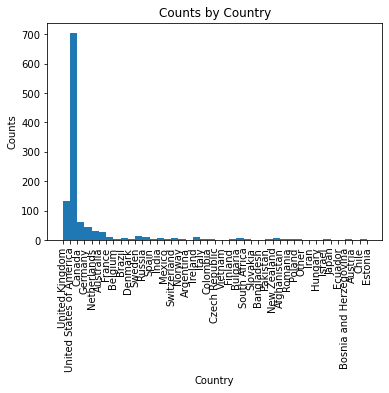

In [70]:
plt.hist(df['What country do you live in?'],
         bins = len(df['What country do you live in?'].unique())-1)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Counts')
plt.title('Counts by Country')
plt.show()

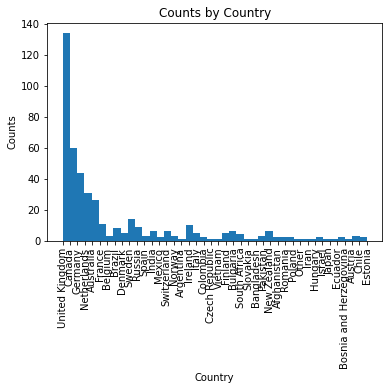

In [28]:
#visualize different countries
other_country = countries[countries<5].sum()
plt.hist(df.loc[df['What country do you live in?'] != 'United States of America', 'What country do you live in?'], 
         bins = len(df['What country do you live in?'].unique())-1)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Counts')
plt.title('Counts by Country')
plt.show()

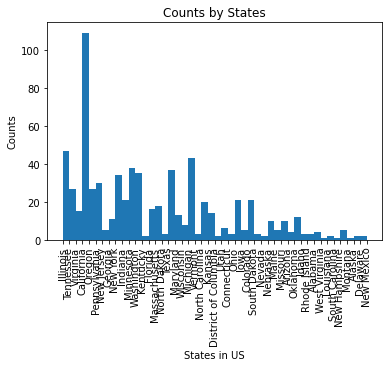

California              109
Illinois                 47
Michigan                 43
Minnesota                38
Texas                    37
Washington               35
New York                 34
Pennsylvania             30
Tennessee                27
Oregon                   27
Indiana                  21
Colorado                 21
Ohio                     21
North Carolina           20
Massachusetts            18
Florida                  16
Virginia                 15
Kansas                   14
Maryland                 13
Oklahoma                 12
Georgia                  11
Nebraska                 10
Missouri                 10
Wisconsin                 8
Utah                      6
Iowa                      5
New Jersey                5
New Hampshire             5
Maine                     5
Alabama                   4
Arizona                   4
Vermont                   3
Connecticut               3
North Dakota              3
South Dakota              3
Rhode Island        

In [29]:
#visualize different states
live_states = df.loc[df['What US state or territory do you live in?'].notna(), 'What US state or territory do you live in?']
# print(live_states)
plt.hist(live_states, bins = len(live_states.unique())-1)
plt.xticks(rotation = 90)
plt.xlabel('States in US')
plt.ylabel('Counts')
plt.title('Counts by States')
plt.show()
print(live_states.value_counts())

In [30]:
#function to switch states to regions
##input: series of states in US
##output: list of regions of the states
##region information from https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#Interstate_regions
def state_to_region(states):
    northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
    midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
    west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
    region = list()
    for eachstate in states:
        if type(eachstate) == float:
            region.append(eachstate)
        elif eachstate in northeast:
            region.append('northeast')
        elif eachstate in midwest:
            region.append('midwest')
        elif eachstate in west:
            region.append('west')
        else:
            region.append('south')
    return region

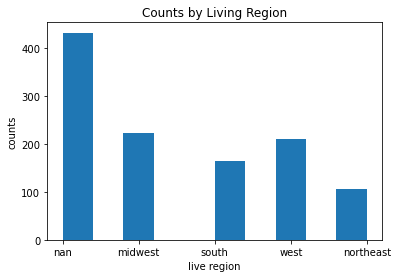

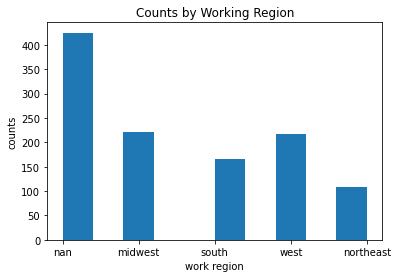

1136 1136 1136


In [31]:
#plot the counts of region
live_region = state_to_region(df['What US state or territory do you live in?'])
work_region = state_to_region(df['What US state or territory do you work in?'])

plt.hist(live_region)
plt.xlabel('live region')
plt.ylabel('counts')
plt.title('Counts by Living Region')
plt.show()

plt.hist(work_region)
plt.xlabel('work region')
plt.ylabel('counts')
plt.title('Counts by Working Region')
plt.show()

print(df.shape[0], len(live_region), len(work_region))

In [32]:
#substitute states for region
df_states = pd.DataFrame({'What US state or territory do you work in?':work_region, 
                          'What US state or territory do you live in?':live_region})
df_states_dummy = pd.get_dummies(df_states, 
                                 prefix = ['What US state or territory do you work in?', 
                                           'What US state or territory do you live in?']) #dropped nan dummy by not creating it 

#substitute US & other for countries
df_country = df[['What country do you work in?', 'What country do you live in?']].copy()
df_country.loc[df_country['What country do you work in?'] != 'United States of America', 'What country do you work in?'] = 'other'
df_country.loc[df_country['What country do you live in?']!= 'United States of America', 'What country do you live in?'] = 'other'
df_country_dummy = pd.get_dummies(df_country, 
                                  prefix = ['What country do you work in?', 'What country do you live in?'], 
                                  drop_first = True) #does not have nan, so drop a class

In [33]:
#get labels for states
df_state_label = df_states.copy()
for eachcol in df_state_label.columns:
    df_state_label[eachcol] = df_state_label[eachcol].astype('category')
    df_state_label[eachcol] = df_state_label[eachcol].cat.codes #NA is -1

#get labels for country
df_country_label = df_country.copy()
for eachcol in df_country_label.columns:
    df_country_label[eachcol] = df_country_label[eachcol].astype('category')
    df_country_label[eachcol] = df_country_label[eachcol].cat.codes

What columns could have answers from text box?

In [34]:
#check for columns that have a lot of unique values
lot_unique = list() #store column names that have a lot of unique values
for each in df.columns:
    len_uni = len(df[each].unique())
    if len_uni > 5:
        print(each, len_uni, df[each].dtype) 
        lot_unique.append(each)

How many employees does your company or organization have? 6 object
If a mental health issue prompted you to request a medical leave from work, asking for that leave would be: 6 object
Why or why not? 855 object
Why or why not?.1 851 object
How willing would you be to share with friends and family that you have a mental illness? 6 object
If so, what condition(s) were you diagnosed with? 91 object
What is your age? 46 int64
What is your gender? 61 object
What country do you live in? 43 object
What US state or territory do you live in? 48 object
What country do you work in? 44 object
What US state or territory do you work in? 49 object
Which of the following best describes your work position? 179 object


In [35]:
#drop the why questions
print(df.shape)
df = df.drop('Why or why not?', axis = 1).drop('Why or why not?.1', axis = 1)
print(df.shape)

(1136, 51)
(1136, 49)


categorize NAN in yes no questions to I dont know

In [36]:
#get names of columns that are not cleaned separately
text_int_col = ['If so, what condition(s) were you diagnosed with?', 
                'What is your gender?', 
                'Which of the following best describes your work position?', 
                'What is your age?', 
                'What country do you work in?', 
                'What country do you live in?', 
                'What US state or territory do you work in?', 
                'What US state or territory do you live in?'] #columns that cannot use get_dummies
other_cat = list()
for each in df.columns.values:
    if each not in text_int_col:
        other_cat.append(each)
other_cat_na = df[other_cat].isna().sum()
non_zero = other_cat_na[other_cat_na>0]
non_zero_col = non_zero.index
print(non_zero_col)
print(df.shape[1], len(other_cat))

Index(['Do you know the options for mental health care available under your employer-provided coverage?',
       'Have your previous employers provided mental health benefits?',
       'Were you aware of the options for mental health care provided by your previous employers?',
       'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
       'Did your previous employers provide resources to learn more about mental health issues and how to seek help?',
       'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
       'Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
       'Do you think that discussing a physical health issue with previous employers would have negative consequences?',
       'Would you have been willing to discuss a mental health issue 

In [37]:
#set nan to i dont know
for question in non_zero_col:
    if question.find('What US state or territory') == -1: #avoid state questions because I'll split dataframe into 2 later
        if question == 'Do you know the options for mental health care available under your employer-provided coverage?':
            df.loc[df[question].isna(), question] = 'I am not sure'
        elif question == 'Were you aware of the options for mental health care provided by your previous employers?':
            df.loc[df[question].isna(), question] = 'N/A (not currently aware)'
        elif question == 'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?':
            df.loc[df[question].isna(), question] = 'Maybe/Not sure'
        else:
            df.loc[df[question].isna(), question] = "I don't know"
check_na = df.isna().sum()
print(check_na[check_na>0]) #print the ones still have NAN values, should be why and state questions

If so, what condition(s) were you diagnosed with?    576
What is your gender?                                   3
What US state or territory do you live in?           432
What US state or territory do you work in?           425
dtype: int64


get all columns except textbox columns (including response variable Y)

In [38]:
#get dummies for question 1
df_dummy_list = list()
for each in other_cat:
    if each == 'Do you currently have a mental health disorder?': #use labels for response variable
        y_labels = df['Do you currently have a mental health disorder?'].astype('category').cat.codes
    else: #for features 
        current = df[each]
        current_dummy = pd.get_dummies(current, prefix = each, drop_first = True)
        df_dummy_list.append(current_dummy)
df_other_dummies = pd.concat(df_dummy_list, axis = 1)
df_other_dummies['Do you currently have a mental health disorder?'] = y_labels
print(df_other_dummies.shape, df.shape)
# print(df_other_dummies.columns)

other_dummy_na = df_other_dummies.isna().sum()
print(other_dummy_na[other_dummy_na>0])

(1136, 107) (1136, 49)
Series([], dtype: int64)


In [39]:
print('mapping for question 1: \n', dict(enumerate(df['Do you currently have a mental health disorder?'].astype('category').cat.categories)))

mapping for question 1: 
 {0: 'Maybe', 1: 'No', 2: 'Yes'}


In [40]:
df_other_dummies

,How many employees does your company or organization have?_100-500,How many employees does your company or organization have?_26-100,How many employees does your company or organization have?_500-1000,How many employees does your company or organization have?_6-25,How many employees does your company or organization have?_More than 1000,Is your employer primarily a tech company/organization?_1.0,Does your employer provide mental health benefits as part of healthcare coverage?_No,Does your employer provide mental health benefits as part of healthcare coverage?_Not eligible for coverage / N/A,Does your employer provide mental health benefits as part of healthcare coverage?_Yes,Do you know the options for mental health care available under your employer-provided coverage?_No,...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Often","If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Rarely","If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Sometimes","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Not applicable to me","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Often","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Rarely","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Sometimes",Do you work remotely?_Never,Do you work remotely?_Sometimes,Do you currently have a mental health disorder?
0,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
1,0,0,0,1,0,1,1,0,0,0,...,0,1,0,0,0,0,1,1,0,2
2,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,2
4,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,2
1132,0,0,1,0,0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,2
1133,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1134,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,2


In [41]:
#get labels for these columns
df_other_label = df.copy()[other_cat]
for eachcol in other_cat:
    df_other_label[eachcol] = df_other_label[eachcol].astype('category').cat.codes

In [42]:
#get dummies for question 2
df_dummy_list2 = list()
for each in other_cat:
    if each == 'Have you ever sought treatment for a mental health issue from a mental health professional?': #use labels for response variable
        y_labels2 = df['Have you ever sought treatment for a mental health issue from a mental health professional?'].astype('category').cat.codes
    else: #for features 
        current = df[each]
        current_dummy = pd.get_dummies(current, prefix = each, drop_first = True)
        df_dummy_list2.append(current_dummy)
df_other_dummies2 = pd.concat(df_dummy_list2, axis = 1)
df_other_dummies2['Have you ever sought treatment for a mental health issue from a mental health professional?'] = y_labels2
print(df_other_dummies2.shape, df.shape)
print('mapping for y2: \n', dict(enumerate(df['Have you ever sought treatment for a mental health issue from a mental health professional?'].astype('category').cat.categories)))

(1136, 108) (1136, 49)
mapping for y2: 
 {0: 0, 1: 1}


In [43]:
df_other_dummies2['Have you ever sought treatment for a mental health issue from a mental health professional?'] 

0       0
1       1
2       1
3       1
4       1
       ..
1131    1
1132    1
1133    1
1134    0
1135    0
Name: Have you ever sought treatment for a mental health issue from a mental health professional?, Length: 1136, dtype: int8

get diagnoses

In [44]:
import nltk
import re

In [45]:
#gathering strings from diagnosis
# df_diag = df.loc[df['If so, what condition(s) were you diagnosed with?'].notna(), 'If so, what condition(s) were you diagnosed with?']
df_diag = df['If so, what condition(s) were you diagnosed with?']
print(df_diag.shape, df_diag.index)
diagnoses = list()
for each in df_diag:
    if type(each) != float:
        each_str = each.lower()
        if each_str.find('|') > -1:
            split_each = each_str.split('|')
            for eachsplit in split_each:
                diagnoses.append(eachsplit)
        else: 
            diagnoses.append(each_str)
    else: diagnoses.append('999')
        
diag_counts = pd.Series(diagnoses).value_counts()
print(diag_counts)

(1136,) RangeIndex(start=0, stop=1136, step=1)
999                                                                                  576
mood disorder (depression, bipolar disorder, etc)                                    415
anxiety disorder (generalized, social, phobia, etc)                                  294
attention deficit hyperactivity disorder                                             104
post-traumatic stress disorder                                                        53
obsessive-compulsive disorder                                                         33
stress response syndromes                                                             21
personality disorder (borderline, antisocial, paranoid, etc)                          20
substance use disorder                                                                18
eating disorder (anorexia, bulimia, etc)                                              14
addictive disorder                                             

In [46]:
diag_counts.unique()

array([576, 415, 294, 104,  53,  33,  21,  20,  18,  14,  10,   5,   4,
         2,   1])

In [47]:
#create list of key words and get counts for visualization
#anxiety disorder: PTSD, OCD
#autism: asperger
#substance use: addiction
#unitypoint.org/livewell/article.aspx?id=3705d64a-a233-4448-ab37-f9cc95ea784b
#https://www.webmd.com/brain/autism/mental-health-aspergers-syndrome
#https://en.wikipedia.org/wiki/Substance_use_disorder
diagnose_list = ['mood disorder', 'anxiety disorder', 'autism spectrum disorder', 
                 'attention deficit disorder', 'personality disorder', 'eating disorder', 
                 'substance use disorder', 'psychotic disorder', 'dissociative disorder', 'other diagnose']
diag_dict = dict()
for each in diagnose_list:
    diag_dict[each] = [0]
    
# print('answers categorized as other: \n')
for each in diagnoses:
#     current_row = [0] * 6 #store dummy values in order of mood, anxiety, attention, substance, personality, other
    indicator = True
    if each == '999':
        continue
    if each.find('depression') > -1:
        diag_dict['mood disorder'][0] += 1
#         current_row[0] = 1
        indicator = False
    if each.find('stress') > -1 or each.find('obsessive') > -1 or each.find('anxiety') > -1:
        diag_dict['anxiety disorder'][0] += 1
#         current_row[1] = 1
        indicator = False
    if each.find('autism') > -1 or each.find('asperger') > -1:
        diag_dict['autism spectrum disorder'][0] += 1
#         current_row[5] = 1
        indicator = False
    if each.find('attention') > -1:
        diag_dict['attention deficit disorder'][0] += 1
#         current_row[2] = 1
        indicator = False
    if each.find('personality') > -1:
        diag_dict['personality disorder'][0] += 1
#         current_row[4] = 1
        indicator = False
    if each.find('eating') > -1:
        diag_dict['eating disorder'][0] += 1
#         current_row[5] = 1
        indicator = False
    if each.find('addict') > -1 or each.find('substance') > -1:
        diag_dict['substance use disorder'][0] += 1
#         current_row[3] = 1
        indicator = False
    if each.find('schizo') > -1:
        diag_dict['psychotic disorder'][0] += 1
#         current_row[5] = 1
        indicator = False
    if each.find('dissociative') > -1:
        diag_dict['dissociative disorder'][0] += 1
#         current_row[5] = 1
        indicator = False
    if indicator:
#         print(each)
        diag_dict['other diagnose'][0] += 1
#         current_row[5] = 1
#     row_values.append(current_row)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


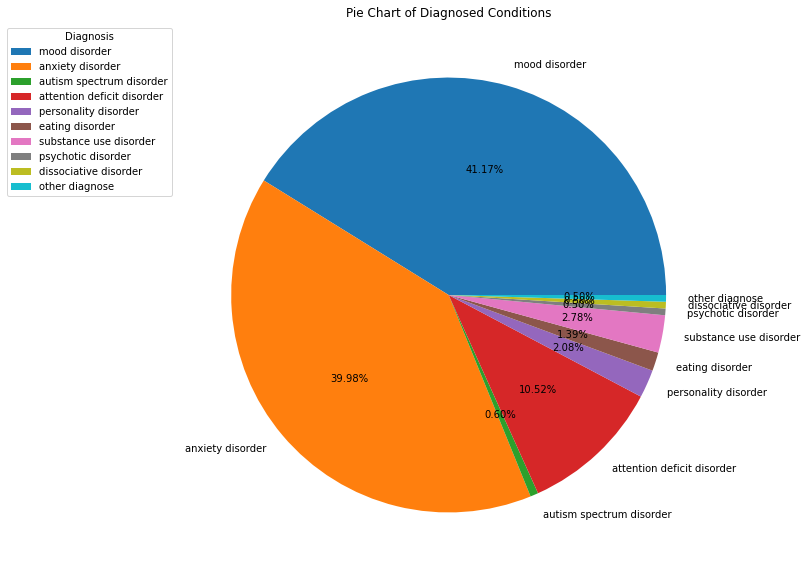

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


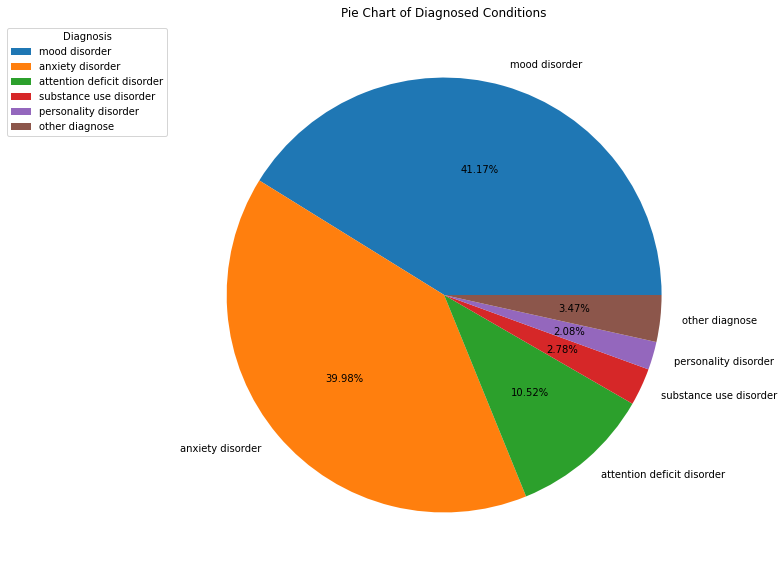

In [48]:
#pie chart
df_diag = pd.DataFrame(diag_dict)
fig, ax = plt.subplots(figsize = (10, 10))
wedges, texts, autotext  = ax.pie(df_diag, 
                                  labels = df_diag.columns, 
                                  autopct = '%.2f%%')
ax.legend(wedges, 
          df_diag.columns, 
          title = 'Diagnosis', 
          loc = 'best', 
          bbox_to_anchor = [0, 1])
ax.set_title('Pie Chart of Diagnosed Conditions')
plt.show()

#top ones
df_diagsort = df_diag.sort_values(by = 0, axis = 1, ascending = False)
df_top5 = df_diagsort.loc[:, df_diagsort.columns.values[:5]]
df_top5['other diagnose'] = df_diagsort.iloc[:, 5:].sum(axis = 1)

fig, ax = plt.subplots(figsize = (10, 10))
wedges, texts, autotext  = ax.pie(df_top5, 
                                  labels = df_top5.columns, 
                                  autopct = '%.2f%%')
ax.legend(wedges, 
          df_top5.columns, 
          title = 'Diagnosis', 
          loc = 'best', 
          bbox_to_anchor = [0, 1])
ax.set_title('Pie Chart of Diagnosed Conditions')
plt.show()


In [49]:
# get dummy variables
df_diagnosis = df['If so, what condition(s) were you diagnosed with?']
unique_diag = df_top5.columns.values
row_values = list()

for eachdiag in df_diagnosis:
    current_row = [0] * 6 #store dummy values in order of mood, anxiety, attention, substance, personality, other
    if type(eachdiag) != float:
        eachlower = eachdiag.lower() #lower cases to match key words
#         indicator = True
        split = eachlower.split('|') #split the string
        for each in split: #for each value in the cell
            if each.find('depression') > -1: 
#                 print(each)
                current_row[0] = 1
#                 indicator = False
            elif each.find('stress') > -1 or each.find('obsessive') > -1 or each.find('anxiety') > -1:
                current_row[1] = 1
#                 indicator = False
            elif each.find('attention') > -1:
                current_row[2] = 1
#                 indicator = False
            elif each.find('personality') > -1:
                current_row[4] = 1
#                 indicator = False
            elif each.find('addict') > -1 or each.find('substance') > -1:
                current_row[3] = 1
#                 indicator = False
            else: #if none of the above is found then it's the other category
                current_row[5] = 1
        row_values.append(current_row) #append the coded row
    else: #when row is nan
        row_values.append(current_row) #append all zeros

df_diag_dummy = pd.DataFrame(row_values, 
                             columns = ['mood disorder', 'anxiety disorder', 
                                        'attention deficit disorder', 'substance use disorder', 'personality disorder', 'other diagnose']) #implement one hot encoding by converting all the encoding to dataframe
# df_diag_dummy['original'] = df_diagnosis
diag_col = df_diag_dummy.columns.values #get all the column names for pos dummy dataframe
df_diag_dummy[diag_col] = df_diag_dummy[diag_col].astype('category') #change all the columns to category
df_diag_dummy

,mood disorder,anxiety disorder,attention deficit disorder,substance use disorder,personality disorder,other diagnose
0,0,1,0,0,0,0
1,1,1,0,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
1131,0,0,1,0,0,0
1132,1,1,0,0,0,0
1133,1,1,0,0,0,0
1134,1,0,0,0,0,0


In [50]:
# #get labels for diagnoses
# df_diag_label = list()
# for eachdiag in df_diagnosis:
#     if type(each) != float:
#         df_diag_label.append(eachdiag)
#     else:
#         eachlower = eachdiag.lower() #lower cases to match key words
#         split = eachlower.split('|') #split the string
#         for each in split: #for each value in the cell
#             if each.find('depression') > -1: 
#                 df_diag_label.append('mood disorder')
#             elif each.find('stress') > -1 or each.find('obsessive') > -1 or each.find('anxiety') > -1:
#                 df_diag_label.append('anxiety disorder')
#             elif each.find('attention') > -1:
#                 df_diag_label.append('attention deficit disorder')
#             elif each.find('personality') > -1:
#                 df_diag_label.append('personality disorder')
#             elif each.find('addict') > -1 or each.find('substance') > -1:
#                 df_diag_label.append('substance use disorder')
#             else: #if none of the above is found then it's the other category
#                 df_diag_label.append('other diagnose')
# # df_diag_label = pd.DataFrame({'If so, what condition(s) were you diagnosed with?':df_diag_label})
# # df_diag_label = df_diag_label['If so, what condition(s) were you diagnosed with?'].astype('category').cat.codes
# df_diag_label

get gender

In [51]:
# df_gender = df.loc[df['What is your gender?'].notna(), 'What is your gender?']
df_gender = df['What is your gender?']
gender = list()
for each in df_gender:
    if type(each) != float:
        g_low = each.lower()
        g_low = re.sub(' ', '', g_low)
        gender.append(g_low)
    else: 
        gender.append('999')
print(pd.Series(gender).unique())
print(len(df_gender), len(gender))

['male' 'female' 'm' 'iidentifyasfemale.' 'bigender' 'non-binary'
 'femaleassignedatbirth' 'f' 'woman' 'man' 'fm' 'cisfemale'
 'transitioned,m2f' 'genderfluid(bornfemale)' 'other/transfeminine'
 'femaleormulti-genderfemme' 'female/woman' 'cismale' 'male.'
 'androgynous' 'male9:1female,roughly' '999' 'male(cis)' 'other'
 'nbmasculine' 'cisgenderfemale' 'sexismale' 'noneofyourbusiness'
 'genderqueer' 'human' 'genderfluid' 'enby' 'genderqueerwoman' 'queer'
 'agender' 'dude' 'mail' 'male/genderqueer' 'fem' 'nonbinary'
 'female(propsformakingthisafreeformfield,though)' 'male(trans,ftm)'
 'cis-woman' 'cisdude' 'genderfluxdemi-girl' 'cisman' 'transgenderwoman']
1136 1136


In [52]:
#create gender list
#non-binary = queer
#https://en.wikipedia.org/wiki/Non-binary_gender
#https://theydiffer.com/difference-between-gender-fluid-and-bi-gender/
gender_labeled = list()
# temp = list()
for each in gender:
    if each == '999':
        gender_labeled.append(float('nan'))
    elif each.find('bi') > -1 or each.find('male9:1female,roughly') > -1:
        gender_labeled.append(0)
    elif each.find('non') > -1 or each.find('queer') > -1:
        gender_labeled.append(1)
    elif each.find('trans') > -1:
        gender_labeled.append(2)
    elif each.find('fluid') > -1:
        gender_labeled.append(3)
    elif each.find('female') > -1 or each.find('woman') > -1 or (len(each) == 1 and each.find('f') > -1):
        gender_labeled.append(4)
#         temp.append(each)
    elif each.find('male') > -1 or (len(each) == 3 and each.find('man') > -1) or each.find('dude') > -1 or each.find('dude') > -1 or (len(each) == 1 and each.find('m') > -1):
        gender_labeled.append(5)
#         temp.append(each)
    else:
        gender_labeled.append(6)
print(pd.Series(gender_labeled).value_counts(), len(gender_labeled), df_gender.shape[0])
# print('values in male category: \n', pd.Series(temp).value_counts())

5.0    837
4.0    264
6.0     12
0.0      8
1.0      6
2.0      4
3.0      2
dtype: int64 1136 1136


In [53]:
#put all categories other than male (5) and female (4) to others (6)
for each in range(len(gender_labeled)):
    current = gender_labeled[each]
    if current != 5 and current != 4:
        gender_labeled[each] = 6
print(pd.Series(gender_labeled).value_counts())
print('labeled length: ', len(gender_labeled), '\noriginal column length: ', df_gender.shape[0])
# df_gender_dummy = pd.DataFrame(gender_labeled, columns = 'gender')
# print(df_gender_dummy)
df_gender_dummy = pd.get_dummies(gender_labeled, prefix = 'gender')
print(df_gender_dummy)
df_gender_dummy = df_gender_dummy.rename(columns = {'gender_4':'gender_female', 'gender_5':'gender_male'}).drop('gender_6', axis = 1) #leave others out for dummy variables
print(df_gender_dummy)

5    837
4    264
6     35
dtype: int64
labeled length:  1136 
original column length:  1136
      gender_4  gender_5  gender_6
0            0         1         0
1            0         1         0
2            0         1         0
3            1         0         0
4            0         1         0
...        ...       ...       ...
1131         1         0         0
1132         1         0         0
1133         0         1         0
1134         1         0         0
1135         0         0         1

[1136 rows x 3 columns]
      gender_female  gender_male
0                 0            1
1                 0            1
2                 0            1
3                 1            0
4                 0            1
...             ...          ...
1131              1            0
1132              1            0
1133              0            1
1134              1            0
1135              0            0

[1136 rows x 2 columns]


In [54]:
#get labels for gender
df_gender_label = pd.DataFrame({'What is your gender?':gender_labeled})

Which of the following best describes your work position?

In [55]:
df_pos = df['Which of the following best describes your work position?'] #extract column
print('number of na values: ', df_pos.isnull().sum()) #number of nan values in the column
df_pos = df_pos.reset_index().drop('index', axis = 1)

#get a list of unique positions
multi_pos = [] #store positions
nrow = df_pos.shape[0]
for eachpos in range(nrow):
    current = df_pos.loc[eachpos, 'Which of the following best describes your work position?']
    low_pos = current.lower()
    parsed = low_pos.split('|')
    multi_pos += parsed
unique_pos = list(pd.Series(multi_pos).unique())

#transit column to dummy variables
pos_dummy = list() #store dummy values for each row
for eachpos in range(nrow):
    current = df_pos.loc[eachpos, 'Which of the following best describes your work position?']
    low_pos = current.lower()
    parsed = low_pos.split('|')
#     print(parsed)
    temp_pos = [0] * len(unique_pos)
    for eachparse in parsed:
        pos_index = unique_pos.index(eachparse)
        temp_pos[pos_index] = 1
    pos_dummy.append(temp_pos)
    if len(parsed) != sum(temp_pos): #sum of 1s for the row should be the same as length of parsed list, but if not the same
        print(eachpos) #print the row number for debugging

#make the dummy df
df_pos_dummy = pd.DataFrame(pos_dummy, columns = unique_pos).drop('hr', axis = 1)
df_pos_dummy.rename(columns = {'other':'other position'}, inplace = True)
# df_pos_dummy['original'] = df_pos
pos_col = df_pos_dummy.columns.values #get all the column names for pos dummy dataframe
df_pos_dummy[pos_col] = df_pos_dummy[pos_col].astype('category') #change all the columns to category
print(df_pos_dummy)

number of na values:  0
     back-end developer front-end developer executive leadership  \
0                     1                   0                    0   
1                     1                   1                    0   
2                     1                   0                    0   
3                     1                   1                    1   
4                     1                   1                    0   
...                 ...                 ...                  ...   
1131                  0                   0                    0   
1132                  0                   0                    0   
1133                  1                   0                    0   
1134                  0                   0                    0   
1135                  0                   0                    0   

     supervisor/team lead dev evangelist/advocate devops/sysadmin support  \
0                       0                       0               0       0   
1    

# Prepare output files

**Splitting Country**

Combine dummy variables with main df

In [56]:
# df_dummy = df.copy()
print(df_other_dummies.shape, df_diag_dummy.shape, df_gender_dummy.shape, df_pos_dummy.shape)
df_dummy = pd.concat([df_other_dummies, df_diag_dummy, df_gender_dummy, df_pos_dummy], axis = 1)
df_dummy['age'] = df['What is your age?']
df_dummy['What country do you work in?'] = df['What country do you work in?']
df_dummy['What country do you live in?'] = df['What country do you live in?']
df_dummy['What US state or territory do you work in?'] = df['What US state or territory do you work in?']
df_dummy['What US state or territory do you live in?'] = df['What US state or territory do you live in?']
print(df_dummy.shape)
# df_dummy['gender'] = gender_labeled
# df_dummy['gender'] = df_dummy['gender'].astype('category')
# df_dummy = df_dummy.drop('Which of the following best describes your work position?', axis = 1).drop('What is your gender?', axis = 1).drop('If so, what condition(s) were you diagnosed with?', axis = 1)
print(df.shape)

(1136, 107) (1136, 6) (1136, 2) (1136, 11)
(1136, 131)
(1136, 49)


check on nan

In [57]:
dummy_na = df_dummy.isna().sum() #find number of NAN values of each column
non_zero = dummy_na[dummy_na>0] #get those columns that have non-zero NAN values
non_zero_col = list()
for each in range(len(non_zero)):
    col_name = non_zero.index[each] #get the question/column name
    if col_name.find('why') == -1: #exclude the why or why not questions
        non_zero_col.append(col_name) #store the column names
        print(non_zero.index[each]) #print column name
        print(df_dummy[col_name].unique()) #print its unique values
        print(df_dummy[col_name].isna().sum()) #print how many NAN values there are

What US state or territory do you work in?
[nan 'Illinois' 'Tennessee' 'Virginia' 'California' 'Oregon'
 'Pennsylvania' 'New Jersey' 'Georgia' 'New York' 'Indiana' 'Minnesota'
 'Washington' 'Kentucky' 'Florida' 'Massachusetts' 'North Dakota' 'Texas'
 'District of Columbia' 'Michigan' 'Vermont' 'North Carolina' 'Missouri'
 'Kansas' 'Utah' 'Connecticut' 'Maryland' 'Ohio' 'Iowa' 'Colorado'
 'South Dakota' 'Nevada' 'Hawaii' 'Nebraska' 'Maine' 'Arizona' 'Oklahoma'
 'Wisconsin' 'Rhode Island' 'Alabama' 'West Virginia' 'Louisiana'
 'South Carolina' 'New Hampshire' 'Montana' 'Idaho' 'Alaska' 'Delaware'
 'New Mexico']
425
What US state or territory do you live in?
[nan 'Illinois' 'Tennessee' 'Virginia' 'California' 'Oregon'
 'Pennsylvania' 'New Jersey' 'Georgia' 'New York' 'Indiana' 'Minnesota'
 'Washington' 'Kentucky' 'Florida' 'Massachusetts' 'North Dakota' 'Texas'
 'Maryland' 'Wisconsin' 'Michigan' 'Vermont' 'North Carolina' 'Kansas'
 'District of Columbia' 'Utah' 'Connecticut' 'Ohio' 'Iowa'

split dataframe into inside and outside US dfs

In [58]:
#split
us_dummy = df_dummy[df_dummy['What country do you live in?'] == 'United States of America']
us_dummy = us_dummy.drop('What country do you live in?', axis = 1).drop('What country do you work in?', axis = 1)
not_us_dummy = df_dummy[df_dummy['What country do you live in?'] != 'United States of America']
not_us_dummy = not_us_dummy.drop('What US state or territory do you live in?', axis = 1).drop('What US state or territory do you work in?', axis = 1)
print(us_dummy.shape, not_us_dummy.shape)

(704, 129) (432, 129)


In [59]:
#double check NAN after splitting
nan_us = us_dummy.isna().sum()
nan_not_us = not_us_dummy.isna().sum()
print(nan_us[nan_us>0])
print(nan_not_us[nan_not_us>0])

#substitute NAN with most frequenct value
print(us_dummy['What US state or territory do you work in?'].value_counts())
us_dummy.loc[us_dummy['What US state or territory do you work in?'].isna(), 'What US state or territory do you work in?'] = 'California'
nan_us = us_dummy.isna().sum()
print(nan_us[nan_us>0])

What US state or territory do you work in?    1
dtype: int64
Series([], dtype: int64)
California              117
Illinois                 48
Michigan                 42
Texas                    38
Minnesota                38
New York                 37
Washington               32
Pennsylvania             29
Tennessee                28
Oregon                   24
Colorado                 21
North Carolina           20
Massachusetts            20
Ohio                     20
Indiana                  19
Florida                  14
Kansas                   14
Virginia                 13
Oklahoma                 12
Georgia                  11
Maryland                 11
Nebraska                 10
Wisconsin                 9
Missouri                  9
Utah                      6
District of Columbia      6
New Jersey                5
Iowa                      5
Arizona                   4
Alabama                   4
Maine                     4
Connecticut               3
North Dakota      

make dummy variables out of states and countries

In [60]:
work_states_dummy = pd.get_dummies(us_dummy['What US state or territory do you work in?'], prefix = 'What US state or territory do you work in?')
live_states_dummy = pd.get_dummies(us_dummy['What US state or territory do you live in?'], prefix = 'What US state or territory do you live in?')
work_country_dummy = pd.get_dummies(not_us_dummy['What country do you work in?'], prefix = 'What country do you work in?')
live_country_dummy = pd.get_dummies(not_us_dummy['What country do you live in?'], prefix = 'What country do you live in?')
print(work_states_dummy.shape, live_states_dummy.shape, work_country_dummy.shape, live_country_dummy.shape)
us_dummy = pd.concat([us_dummy, work_states_dummy, live_states_dummy], axis = 1)
us_dummy = us_dummy.drop('What US state or territory do you work in?', axis = 1).drop('What US state or territory do you live in?', axis = 1)
not_us_dummy = pd.concat([not_us_dummy, work_country_dummy, live_country_dummy], axis = 1)
not_us_dummy = not_us_dummy.drop('What country do you work in?', axis = 1).drop('What country do you live in?', axis = 1)
print(us_dummy.shape, not_us_dummy.shape)

(704, 48) (704, 47) (432, 43) (432, 42)
(704, 222) (432, 212)


In [61]:
us_dummy

,How many employees does your company or organization have?_100-500,How many employees does your company or organization have?_26-100,How many employees does your company or organization have?_500-1000,How many employees does your company or organization have?_6-25,How many employees does your company or organization have?_More than 1000,Is your employer primarily a tech company/organization?_1.0,Does your employer provide mental health benefits as part of healthcare coverage?_No,Does your employer provide mental health benefits as part of healthcare coverage?_Not eligible for coverage / N/A,Does your employer provide mental health benefits as part of healthcare coverage?_Yes,Do you know the options for mental health care available under your employer-provided coverage?_No,...,What US state or territory do you live in?_South Carolina,What US state or territory do you live in?_South Dakota,What US state or territory do you live in?_Tennessee,What US state or territory do you live in?_Texas,What US state or territory do you live in?_Utah,What US state or territory do you live in?_Vermont,What US state or territory do you live in?_Virginia,What US state or territory do you live in?_Washington,What US state or territory do you live in?_West Virginia,What US state or territory do you live in?_Wisconsin
1,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,0,0,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1125,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1132,0,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1133,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Do NOT split countries**

In [62]:
#question 1
print(df.shape, df_states_dummy.shape, df_country_dummy.shape, df_other_dummies.shape, df_diag_dummy.shape, df_gender_dummy.shape, df_pos_dummy.shape)
df_main_dummy = pd.concat([df_states_dummy, df_country_dummy, df_other_dummies, df_diag_dummy, df_gender_dummy, df_pos_dummy], axis = 1)
df_main_dummy['age'] = df['What is your age?']
df_main_dummy.shape

(1136, 49) (1136, 8) (1136, 2) (1136, 107) (1136, 6) (1136, 2) (1136, 11)


(1136, 137)

In [63]:
#check on nan before exporting
main_dummy_na = df_main_dummy.isna().sum()
print(main_dummy_na[main_dummy_na>0].index)
print(df_main_dummy.loc[df_main_dummy['How many employees does your company or organization have?_100-500'].isna(), 
                        'How many employees does your company or organization have?_100-500'])

Index([], dtype='object')
Series([], Name: How many employees does your company or organization have?_100-500, dtype: uint8)


In [64]:
#question 2
print(df.shape, df_states_dummy.shape, df_country_dummy.shape, df_other_dummies2.shape, df_diag_dummy.shape, df_gender_dummy.shape, df_pos_dummy.shape)
df_main_dummy2 = pd.concat([df_states_dummy, df_country_dummy, df_other_dummies2, df_diag_dummy, df_gender_dummy, df_pos_dummy], axis = 1)
df_main_dummy2['age'] = df['What is your age?']
df_main_dummy2.shape

(1136, 49) (1136, 8) (1136, 2) (1136, 108) (1136, 6) (1136, 2) (1136, 11)


(1136, 138)

Labeled df

In [65]:
print(df.shape, df_state_label.shape, df_country_label.shape, df_other_label.shape, df_diag_dummy.shape, df_gender_label.shape, df_pos_dummy.shape)
df_main_label = pd.concat([df_state_label, df_country_label, df_other_label, df_diag_dummy, df_gender_label, df_pos_dummy], axis = 1)
df_main_label['age'] = df['What is your age?']
df_main_label.shape

(1136, 49) (1136, 2) (1136, 2) (1136, 41) (1136, 6) (1136, 1) (1136, 11)


(1136, 64)

# Export dataframe

major changes in columns/rows: 

    dropped columns that have more than 60% nan, 
    dropped ages above 100 and below 21, 
    dropped columns that are used to create one hot encoding, 
    dropped why questions, 
    dropped US state questions for non-US, 
    dropped are you self-employed column (focused on those who are not)
    changed the rest of nan values (all in categorical columns) to 'I don't know' or 'I'm not sure', etc.

data type:
    
    all columns should be categorical except 'age'

dummies:
    
    gender uses label encoding
    diagnosis and work position use one hot encoding

In [66]:
us_dummy.to_csv('US_dummy.csv')
not_us_dummy.to_csv('non-US_dummy.csv')
df_main_dummy.to_csv('main_dummy.csv') #dataframe for question 1
df_main_dummy2.to_csv('main_dummy2.csv') #dataframe for question 2
df_main_label.to_csv('main_label.csv') #all features labeled except diagnosis, position and age

> # Scratch - Not part of the offical code

In [67]:
us_dummy.shape

(704, 222)

In [68]:
not_us_dummy.shape

(432, 212)

In [ ]:
#check for numerical columns for US df
us_type = us.dtypes
for each in range(len(us_type)):  
    if us_type[each] == 'float' or us_type[each] == 'int': #check what variables should remain numberical
        print(us_type.index[each], us_type[each]) #only age is numerical
cat_cols = us.columns[us.columns!='What is your age?'] #get all the column names other than age
us[cat_cols] = us[cat_cols].astype('category') #change all the other columns to categorical
print(us.dtypes[us.dtypes!='category']) #check if every column other than age is categorical

# #apply labels to categorical columns
# for eachcat in cat_cols:
#     us[eachcat] = us[eachcat].cat.codes
#     us[eachcat] = us[eachcat].astype('category')
#     if eachcat == 'Do you work remotely?':
#         break

In [ ]:
us[cat_cols]

In [ ]:
from sklearn import preprocessing

In [ ]:
# #add labels
# le = preprocessing.LabelEncoder()
# mapping = dict()
# for eachcat in cat_cols:
#     le.fit(us[eachcat]) #create labels for current column
#     current_mapping = dict(zip(le.transform(le.classes_), le.classes_)) #map labels to original encoding
#     mapping[eachcat] = current_mapping #store mapping of current column
#     us[eachcat] = le.transform(us[eachcat]) #apply labels for column
#     us[eachcat]
#     if eachcat == 'Do you work remotely?':
#         break
# le.fit(us['How many employees does your company or organization have?'])
# print(le.classes_)
# print(le.transform(le.classes_))
# temp = dict(zip(le.transform(le.classes_), le.classes_))
# print(temp)
# print(a)

In [ ]:
#check for numerical columns for non-US df
notus_type = not_us.dtypes
for each in range(len(notus_type)):  
    if notus_type[each] == 'float' or notus_type[each] == 'int': #check what variables should remain numberical
        print('numerical columns:')
        print(notus_type.index[each], notus_type[each]) #only age is numerical
cat_cols = not_us.columns[not_us.columns!='What is your age?'] #get all the column names other than age
not_us[cat_cols] = not_us[cat_cols].astype('category') #change all the other columns to categorical
print(not_us.dtypes[not_us.dtypes!='category']) #check if every column other than age is categorical

In [ ]:
print(us.shape, not_us.shape)

In [ ]:
us.columns.values

In [ ]:
# test = us[['Do you have a family history of mental illness?', 'Have you had a mental health disorder in the past?']]
test = us['Do you have a family history of mental illness?']
print(test)
print(test.unique())
test_dummies = pd.get_dummies(test, prefix = 'Do you have a family history of mental illness?')
print(test_dummies)

In [ ]:
#try logistic regression
from sklearn.linear_model import LogisticRegression
us_cols = us.columns.values
x = us['Do you currently have a mental health disorder?']
y = us[us_cols[us_cols != 'Do you currently have a mental health disorder?']]
lr = LogisticRegression(random_state = 0).fit(x, y)
lr.score(x, y)

In [ ]:
us.loc[us['What US state or territory do you work in?'].isna(), 'What US state or territory do you live in?']
df_temp = us[['What US state or territory do you work in?', 'What US state or territory do you live in?']]

df_temp['What US state or territory do you work in?'] = df_temp['What US state or territory do you work in?'].astype('category')
temp_work_code = df_temp['What US state or territory do you work in?'].cat.codes
df_temp['What US state or territory do you work in?'] = temp_work_code
# df_temp['What US state or territory do you work in?'] = df_temp['What US state or territory do you work in?'].astype('category')


df_temp['What US state or territory do you live in?'] = df_temp['What US state or territory do you live in?'].astype('category')
temp_live_code = df_temp['What US state or territory do you live in?'].cat.codes
df_temp['What US state or territory do you live in?'] = temp_work_code
# df_temp['What US state or territory do you live in?'] = df_temp['What US state or territory do you live in?'].astype('category')

In [ ]:
# from sklearn.linear_model import LinearRegression as lr
# temp_x = df_temp['What US state or territory do you live in?'].reshape(-1, 1)
# temp_y = df_temp['What US state or territory do you work in?'].reshape(-1, 1)
# reg = lr().fit(temp_x, temp_y)
# reg.score(temp_x, temp_y)
df_temp.corr()
us.loc[us['What US state or territory do you live in?']=='Washington', 'What US state or territory do you work in?']

investigate the self-employed respondees

In [ ]:
self_na = df_selfemploy.isna().sum()
print(df_selfemploy.shape)
print(self_na[self_na == df_selfemploy.shape[0]])

In [ ]:
answers = []
df_why = df.loc[df['Why or why not?'].notna(), 'Why or why not?']
print(df_why.unique())
for each in df_why:
    each_lower = each.lower()
    answers += each_lower.split()

ans_counts = pd.Series(answers).value_counts()
print(len(ans_counts))
print(ans_counts[ans_counts > 100])

In [ ]:
#parse diagnosis
test = df.copy()
nrow = list(df.index)
diagnoses = list()
counts = dict()
values = list()
cannotsplit = []
for eachrow in nrow:
    currentvalue = test.loc[eachrow, 'If so, what condition(s) were you diagnosed with?']
    try:
        split_diagnose = currentvalue.split('|')
        values.append(split_diagnose)
    
        for eachsplit in split_diagnose:
            if eachsplit not in diagnoses:
                diagnoses.append(eachsplit)
            if eachsplit in counts:
                counts[eachsplit] += 1
            else:
                counts[eachsplit] = 1
    except:
        continue
#     else:
#         cannotsplit.append(eachrow)
sorted_counts = sorted(counts.items(), reverse = True, key=lambda x: x[1])
other_total = 0
diagnose_col = list()
for each in range(1, len(sorted_counts)-1):
    if each<10:
        diagnose_col.append(sorted_counts[each][0])
    else:
        other_total += sorted_counts[each][1]

for each in counts:
    counts[each] = [counts[each]]
# print(counts)
df_sorted = pd.DataFrame(counts)[diagnose_col]
df_sorted['other'] = other_total
fig, ax = plt.subplots(figsize = (8, 8))
wedges, texts, autotext  = ax.pie(df_sorted, 
                                  labels = df_sorted.columns, 
                                  autopct = '%.2f%%')
ax.legend(wedges, 
          df_sorted.columns, 
          title = 'Diagnosis', 
          loc = 'best', 
          bbox_to_anchor = [0, 1])
# plt.setp(texts, weight = 'bold')
ax.set_title('Pie Chart of Diagnosed Conditions')
plt.show()


In [ ]:
print(df.loc[7, 'If so, what condition(s) were you diagnosed with?'])

In [ ]:
#change object cols to categorical cols
cat_codes = dict() #stores mapping of categorical col codes, key:col name, value:mapping
for eachcol in df.columns: #for each column
    if df[eachcol].dtype == object: #if column type is object
        df[eachcol] = df[eachcol].astype('category') #change its type to category
        dummy = df[eachcol].cat.codes #assign dummy codes to the column values
        mapping = dict(enumerate(df[eachcol].cat.categories)) #store mapping in dictionary, key:code, value:original str value
        cat_codes[eachcol] = mapping #store mapping for this column
        df[eachcol] = dummy #substitude col values with dummy values 

In [ ]:
#correlations
corr = df.corr()
# corr_us = corr.reset_index()
sns.heatmap(corr, 
            xticklabels = range(df.shape[1]),
            yticklabels = range(df.shape[1]))
plt.title('heatmap')
plt.show()
high_corr = corr[abs(corr)>0.5]
print(high_corr) #getting a lot of nan

In [ ]:
print(df['Are you self-employed?'].corr(df['Do you have previous employers?'])) #getting nan above but true value is not nan

In [ ]:
#calculate corr values in loop
dict_corr = dict()
for each1 in df.columns: #for each col1
    list_corr = list() #store corr values for col1
    for each2 in df.columns: #for each col2
        corr = df[each1].corr(df[each2]) #calculate the corr value between col1 and col2
        list_corr.append(corr) #append corr value
    dict_corr[each1] = list_corr #store corr list under key col1
df_corr = pd.DataFrame(dict_corr, index = df.columns) #make dataframe as corr matrix

for each in df_corr.columns: #check for nan values
    if df_corr[each].isnull().sum() > 0: #if there is nan values under current col
        print(each)

sns.heatmap(df_corr, 
            xticklabels = range(df_corr.shape[1]),
            yticklabels = range(df_corr.shape[1]))
plt.title('heatmap')
plt.show()
#heatmap looks the same

In [ ]:
# print(df_corr.isna().sum())
# print(df_corr['Are you self-employed?'].isnull().sum())
df_corr[abs(df_corr)>0.5]

In [ ]:
#check the columns that have nan correlation
q1 = 'Are you self-employed?'
q2 = 'Is your employer primarily a tech company/organization?'
print(df[q2].unique())
print(df[q1].unique())
num_nantech_selfemployed = (df.loc[df[q2].isnull(), q1] != 1).sum() #counts number of 0 in q1 when q2 is nan,
num_selfemployed_nantech = (df.loc[df[q1] == 1, q2].notnull()).sum() #counts number of real values in q2 when q1 is 1
print(num_nantech_selfemployed, num_selfemployed_nantech) 
#zeros for both, so whenever someone answers yes to q1, he has nan for q2, vice versa, therefore answering nan for q2 already indicates the
#answer for q1. We could eliminate q1 and should substitude the nan in q2 with a number
print(cat_codes['Are you self-employed?'])

In [ ]:
#dropping self employed question and substitude nan with number 2
df = df.drop(q1, axis = 1)
df.loc[df[q2].isnull(), q2] = 2
print(df[q2])

In [ ]:
#split the dataframes
print(cat_codes['What country do you live in?']) #US has code 50
# us_code = cat_code['What country do you live in?']['50']
df_us = df[df['What country do you live in?'] == 50] #dataframe for US
df_nonus = df[df['What country do you live in?'] != 50] #dataframe for non-US
print(df_us.shape)
print(df_nonus.shape)
for each in df_us.columns:
    if len(df_us[each].unique()) == 1:
        df_us.drop(each, axis = 1)
        print('df_us dropped', each)
    if len(df_nonus[each].unique()) == 1:
        df_nonus.drop(each, axis = 1)
        print('df_nonus dropped', each)

In [ ]:
#correlations
corr_us = df_us.corr()
# corr_us = corr.reset_index()
sns.heatmap(corr_us, 
            xticklabels = range(df_us.shape[1]),
            yticklabels = range(df_us.shape[1]))
plt.title('heatmap for US data')
plt.show()
corr_nonus = df_nonus.corr()
sns.heatmap(corr_nonus, 
            xticklabels = range(df_nonus.shape[1]),
            yticklabels = range(df_nonus.shape[1]))
plt.title('heatmap for non-US data')
plt.show()

In [ ]:
print(corr_us[corr_us>0.6])